# BOOK - From scratch

First we are going to create two distributions with two types of players, basketball and football players, and we are going to add them all together in a varaible 'y'. We are adding them by using the random.randn function, which will give us 100 numbers between 0 and 1. If the number is bigger than 0.50 we are going to add a basketball player inside the y array, on the other hand if it is smaller we are going to add a football player. After creating a histogram we can see how our data looks. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


(array([  3.,  29., 120., 192., 122.,  89., 190., 188.,  57.,  10.]),
 array([142.2154028 , 150.55382292, 158.89224304, 167.23066316,
        175.56908329, 183.90750341, 192.24592353, 200.58434365,
        208.92276377, 217.26118389, 225.59960401]),
 <a list of 10 Patch objects>)

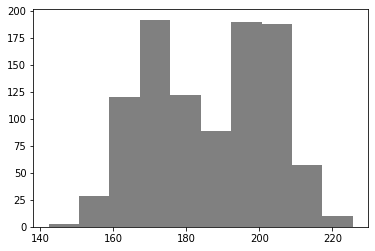

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

""" Fits two Gaussians to data using the EM algorithm """
N = 1000
plt.ion()

y = 1.*np.zeros(N)
# Set up data
basketball_player = np.random.normal(200, 8, N) # Gaussian distribution -> 200 average, 10 std
football_player = np.random.normal(170, 8, N) # Gaussian distribution -> 170 average, 10 std
choice = np.random.rand(N)

#print(f"Football_player: {football_player}\n")
#print(f"Basketball_player: {basketball_player}\n")
#print(f"Choice: {choice}\n")
#print()

# Picks from 100 elements where the choice is bigget than 0.5
w = [choice>=0.5]
y[w] = basketball_player[w]

# Picks from 100 elements where the choice is bigget than 0.5
w = [choice<0.5]
y[w] = football_player[w]

plt.clf()
plt.hist(y, fc='0.5')

 Next step is to initialize our variables. We randomly pick two player from the distrbution, which are going to be our average players for both classes. This average will later be updated. Also we initialize our standard deviation and our pi varaible. The "pi" variable will represent the percentage of the distrbution of classes. 

In [ ]:
# Initialisation
mu1 = y[np.random.randint(0, N-1, 1)]
mu2 = y[np.random.randint(0, N-1, 1)]
s1 = np.sum((y-np.mean(y))**2)/N
s2 = s1
pi = 0.5

For every player we are computing the gamma value. We are going to use the gamma in the following way, if the gamma of a player is small it will not affect the mu2. 

For example:

Our mu1 is 180 and our mu2 is 200. If we have a player that has a height of 205, he will be placed in the basketball player's class, because it's closer to the average value of the basketball player's. On the other hand, if we had a height of 175, the gamma would be lower and the player would be classified as a football player.

After every iteration we adjust our "mu", "s" and "pi" values. We also compute the log likelihood, which needs to fall as the predictions get better.

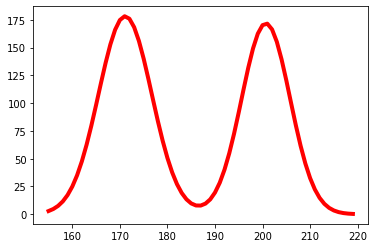

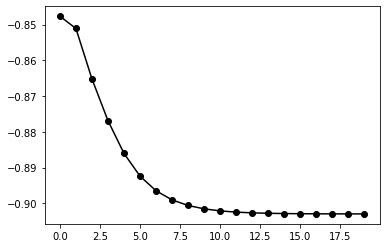

In [ ]:
# EM loop
count = 0
gamma = 1.*np.zeros(N)
number_of_iterations = 20

log_likelihood = 1.*np.ones(number_of_iterations)

while count < number_of_iterations:
  count += 1
  
  # E-step
  for i in range(N):
    gamma[i] = pi*np.exp(-(y[i]-mu1)**2/s1)/ (pi * np.exp(-(y[i]-mu1)**2/s1) + (1-pi)* np.exp(-(y[i]-mu2)**2/s2))
  
  # M-step
  mu1 = np.sum((1-gamma)*y)/np.sum(1-gamma)
  mu2 = np.sum(gamma*y)/np.sum(gamma)
  s1 = np.sum((1-gamma)*(y-mu1)**2)/np.sum(1-gamma)
  s2 = np.sum(gamma*(y-mu2)**2)/np.sum(gamma)
  pi = np.sum(gamma)/N

  log_likelihood[count-1] = np.sum(np.log(pi*np.exp(-(y[i]-mu1)**2/s1) + (1-pi)*np.exp(-(y[i]-mu2)**2/s2)))

x = np.arange(155, 220,1)
y = 350 * pi*np.exp(-(x-mu1)**2/s1) + 350 * (1-pi)*np.exp(-(x-mu2)**2/s2)

plt.plot(x, y ,'r', linewidth=4)
plt.figure(), plt.plot(log_likelihood,'ko-')
plt.show()

Now let's see what happens when the data is not equal. We are going to set w to be True when the choice is bigger then 0.75. This way we get that the football players are going to represent 2/3 of the data.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


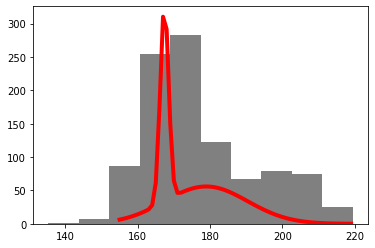

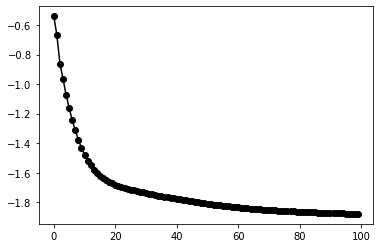

In [1]:
import numpy as np
import matplotlib.pyplot as plt

""" Fits two Gaussians to data using the EM algorithm """
N = 1000
plt.ion()

y = 1.*np.zeros(N)
# Set up data
basketball_player = np.random.normal(200, 8, N) # Gaussian distribution -> 200 average, 10 std
football_player = np.random.normal(170, 8, N) # Gaussian distribution -> 170 average, 10 std
choice = np.random.rand(N)

#print(f"Football_player: {football_player}\n")
#print(f"Basketball_player: {basketball_player}\n")
#print(f"Choice: {choice}\n")
#print()

# Picks from 100 elements where the choice is bigget than 0.5
w = [choice>=0.75]
y[w] = basketball_player[w]

# Picks from 100 elements where the choice is bigget than 0.5
w = [choice<0.75]
y[w] = football_player[w]

plt.clf()
plt.hist(y, fc='0.5')

# Initialisation
mu1 = y[np.random.randint(0, N-1, 1)]
mu2 = y[np.random.randint(0, N-1, 1)]
s1 = np.sum((y-np.mean(y))**2)/N
s2 = s1
pi = 0.5

# EM loop
count = 0
gamma = 1.*np.zeros(N)
number_of_iterations = 100

log_likelihood = 1.*np.ones(number_of_iterations)

while count < number_of_iterations:
  count += 1
  
  # E-step
  for i in range(N):
    gamma[i] = pi*np.exp(-(y[i]-mu1)**2/s1)/ (pi * np.exp(-(y[i]-mu1)**2/s1) + (1-pi)* np.exp(-(y[i]-mu2)**2/s2))
  
  # M-step
  mu1 = np.sum((1-gamma)*y)/np.sum(1-gamma)
  mu2 = np.sum(gamma*y)/np.sum(gamma)
  s1 = np.sum((1-gamma)*(y-mu1)**2)/np.sum(1-gamma)
  s2 = np.sum(gamma*(y-mu2)**2)/np.sum(gamma)
  pi = np.sum(gamma)/N

  log_likelihood[count-1] = np.sum(np.log(pi*np.exp(-(y[i]-mu1)**2/s1) + (1-pi)*np.exp(-(y[i]-mu2)**2/s2)))

x = np.arange(155, 220,1)
y = 350 * pi*np.exp(-(x-mu1)**2/s1) + 350 * (1-pi)*np.exp(-(x-mu2)**2/s2)

plt.plot(x, y ,'r',linewidth=4)
plt.figure(), plt.plot(log_likelihood,'ko-')
plt.show()

Make one with 20 iters and one with 100 iters, and compare them

# Data Science Handbook

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


GMM's can be used for finding clusters in the same manner as k-means does. We are first going to create blobs of data using the make_blobs function from sklearn. After creating the data we are going to stretch it to get data that look like ellipses.

In [ ]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, _ = make_blobs(n_samples=400, centers=2, cluster_std=0.70, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2)) # Stretching our data

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


We are passing the stretched data into the GaussianMixture function from sklearn. We get our predicted labels and we can plot them.

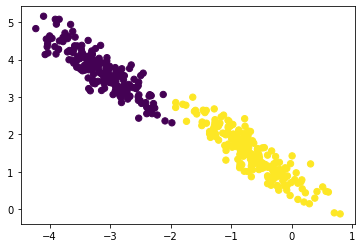

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(X_stretched) # Training

labels = gmm.predict(X_stretched) # Predicting labels
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels, s=40, cmap='viridis')

We can see that our data is pretty much perfectly separated.

But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments—in Scikit-Learn we do this using the predict_proba method. This function returns a matrix of size [n_samples, n_clusters] that measures the probability that any point belongs to a given cluster.

In [ ]:
probs = gmm.predict_proba(X_stretched)
print(probs[:5].round(3))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


We can visualize this uncertainty by making the size of each points proportional to the certainty of its prediction.

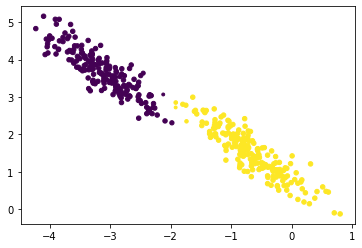

In [ ]:
size = 20 * probs.max(1) ** 2 # square emphasizes differences
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels, cmap='viridis', s=size);

We are going to create a helper function that will help us visualize the locations and shapes of the GMM clusters.

In [ ]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
  """Draw an ellipse with a given position and covariance"""
  ax = ax or plt.gca()
  # Convert covariance to principal axes
  if covariance.shape == (2, 2):
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
  else:
    angle = 0
    width, height = 2 * np.sqrt(covariance)

  # Draw the ellipse
  for nsig in range(1, 4):
    ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
  
def plot_gmm(gmm, X, label=True, ax=None):
  ax = ax or plt.gca()
  labels = gmm.fit(X).predict(X)
  if label:
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
  else:
    ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
  ax.axis('equal')
  w_factor = 0.2 / gmm.weights_.max()
  for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)

Let's see what we get as an result.

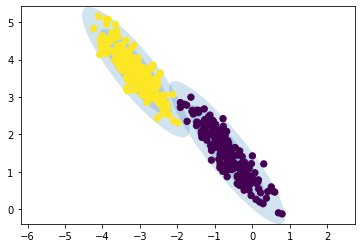

In [ ]:
gmm = GaussianMixture(n_components=2, random_state=42)
plot_gmm(gmm, X_stretched)

Because the GMM is a generative model gives us a natural means of detemening the optimal number of components for a given dataset. A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the likelihood of the data under the model, using cross-validation to avoid overfitting. Another means of correcting for overfitting is to adjust the model likelihoods using some analytic criterion such as the Akaike information criterion (AIC) or the Bayesian infor‐mation criterion (BIC). 

Scikit-Learn’s GMM estimator actually includes built-in methods that compute both of these, and so it is very easy to operate on this approach. The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. 

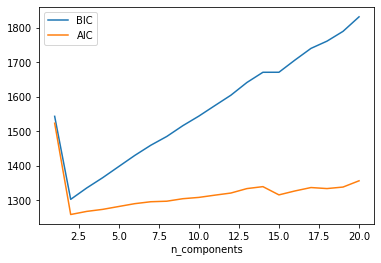

In [ ]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_stretched) for n in n_components]
plt.plot(n_components, [m.bic(X_stretched) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_stretched) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

This tells us that 2 is the best number for the components.

Next thing we can do is we can plot the means_, this will give us the cordinates where the clusters were placed.

In [ ]:
gmm.means_

array([[-0.67695422,  1.52306   ],
       [-3.10748306,  3.66233954]])

Let's plot them and see where they are placed.

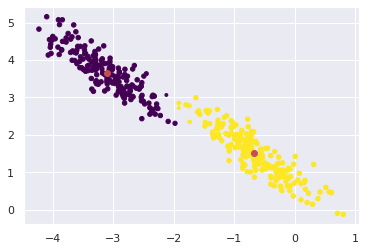

In [ ]:
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels, cmap='viridis', s=size)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='r', cmap='virdis')

By observing this image we can see that they are in the middle of the data.

Add standard deviations.